In [2]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import plot,download_plotlyjs
from matplotlib import pyplot as plt

## EDA on house sale prices

In [3]:
data = pd.read_pickle('../data/cleaned_train.pkl')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500


### 1. Identify data

- type of data quantitative **(discrete,continues)** or qualitative **(nominal,ordinal)**

In [4]:
quantitative = data.select_dtypes(include=np.number)
qualitative = data.select_dtypes(include=np.object)

In [5]:
unq_classes = qualitative.nunique()
print(f'binary categorical variables : {unq_classes[unq_classes==2].index}')
print(f'multi class categorical variables : {unq_classes[unq_classes>2].index}')

binary categorical variables : Index(['Street', 'Utilities', 'CentralAir'], dtype='object')
multi class categorical variables : Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


note : a binary class usually call as **dichotomous variable** and multi class variable call as **polytomous variable**.

- measurement scales **nominal,ordinal,interval,ratio**<br/><br/>
without clear understanding about scale type of data, can't do analysis correctly. it's means what type of
measures should use what are the visualization methods used like..

In [6]:
ordinal = qualitative[['LotShape','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
                       'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu',
                       'GarageFinish','GarageQual','GarageCond','PoolQC']]
nominal = qualitative.drop(ordinal.columns,axis=1)

In [7]:
wrong_scale_nominal = quantitative[['MSSubClass']].astype('object')
wrong_scale_ordinal = quantitative[['OverallQual','OverallCond']].astype('object')

ordinal = pd.concat([ordinal,wrong_scale_ordinal],axis=1)
nominal = pd.concat([nominal,wrong_scale_nominal],axis=1)

In [8]:
quantitative.drop(['MSSubClass','OverallQual','OverallCond'],axis=1,inplace=True)

interval = quantitative[['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']]
ratio = quantitative.drop(interval.columns,axis=1)

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
print(f'Ordinal scale variables: {ordinal.columns}\nnominal scale variables: {nominal.columns}')
print(f'interval scale variables: {interval.columns}\nratio scale variables: {ratio.columns}')

Ordinal scale variables: Index(['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'OverallQual', 'OverallCond'],
      dtype='object')
nominal scale variables: Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')
interval scale variables: Index(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'], dtype='object')
ratio scale variables: Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',

In [10]:
color_map = sns.light_palette('#297343',as_cmap=True)
ratio.sample(100).style.background_gradient(cmap=color_map)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1006,65.000000,8385,220.000000,595,0,390,985,985,0,0,985,0,0,2,0,3,1,6,0,1,328,210,0,0,0,0,0,0,149900
910,149.000000,12589,0.000000,0,0,742,742,742,742,0,1484,0,0,2,1,3,1,8,1,2,390,36,24,0,0,0,0,0,174000
1310,69.985786,7153,88.000000,1200,0,78,1278,1294,0,0,1294,1,0,2,0,3,1,6,0,2,496,112,51,0,0,0,0,0,179200
555,85.000000,10625,292.000000,866,0,132,998,1006,1040,0,2046,1,0,2,1,3,1,8,1,3,871,320,62,0,0,0,0,0,284000
267,70.000000,11207,0.000000,714,0,88,802,802,709,0,1511,1,0,2,1,3,1,8,1,2,413,95,75,0,0,0,0,0,185000
706,70.000000,5600,0.000000,0,0,0,0,372,720,0,1092,0,0,2,0,3,2,7,0,0,0,0,0,0,0,0,0,3500,55000
1388,60.000000,8520,0.000000,168,546,0,714,1664,862,0,2526,0,0,2,0,5,1,10,1,1,216,88,15,0,0,0,0,0,136000
339,91.000000,14145,0.000000,213,0,995,1208,1621,0,0,1621,1,0,2,0,3,1,8,0,2,440,108,45,0,0,0,0,400,202500
1410,46.000000,20544,123.000000,0,0,791,791,1236,857,0,2093,0,0,2,1,3,1,7,1,2,542,364,63,0,0,0,0,0,215000


- line charts can be created on continues data.
- A bar chart is used when you want to show a distribution of data points or perform a comparison of metric values
across different subgroups of your data.
- scatter plots are used to compare relationship of features.
- stacked plot useful when visualize cumulative effect of multiple features.
- pie charts is best used when trying to work out the composition of something.
- Polar Chart is a common variation of circular graphs. It is useful when relationships between data points can be
visualized most easily in terms of radiuses and angles.
- histograms are used to depict the distribution of any quantitative feature.
- lollipop chart can be used to display ranking in the data.

<table>
<tr>
<td><b>show correlation<b/></td>
<td>scatterplot, correlationgram, pairwise plot, jittering with strip plot, count plot, marginal histogram,
regplot, bubble plot</td>
</tr>
<tr>
<td><b>show deviation<b/></td>
<td>area chart, diverging bars, diverging text, diverging dot plot, diverging lollipop plot with markers</td>
</tr>
<tr>
<td><b>show distribution<b/></td>
<td>histogram, density plot, categorical plot, density curves, population pyramid, violin plot, joy plot
distributed dot plot, box plot</td>
</tr>
<tr>
<td><b>show composition<b/></td>
<td>waffle chart, pie chart, treemap, bar chart</td>
</tr>
<tr>
<td><b>show change<b/></td>
<td>time series plot, autocorrelation plot, cross correlation plot, staked area plot, seasonal plot, heatmap
area chart</td>
</tr>
<tr>
<td><b>show groups<b/></td>
<td>dendrogram, cluster plot, andrews curve, parallel coordinates</td>
</tr>
<tr>
<td><b>show ranking<b/></td>
<td>ordered bar chart, lollipop chart, dot plot, slop plot, dumbbell plot</td>
</tr>
</table>

## 2. descriptive statistics

In [11]:
interval.info(),ratio.info(),ordinal.info(),nominal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearBuilt     1460 non-null   int64
 1   YearRemodAdd  1460 non-null   int64
 2   GarageYrBlt   1460 non-null   int32
 3   MoSold        1460 non-null   int64
 4   YrSold        1460 non-null   int64
dtypes: int32(1), int64(4)
memory usage: 62.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1460 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlr

(None, None, None, None)

transform date time features

In [12]:
interval['SoldDate'] = pd.to_datetime(interval[['YrSold','MoSold']].apply(lambda x: '{}{}'.format(x[0],x[1]),axis=1),format='%Y%m')
interval

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold,SoldDate
Id,,,,,,
1,2003,2003,2003,2,2008,2008-02-01
2,1976,1976,1976,5,2007,2007-05-01
3,2001,2002,2001,9,2008,2008-09-01
4,1915,1970,1998,2,2006,2006-02-01
5,2000,2000,2000,12,2008,2008-12-01
...,...,...,...,...,...,...
1456,1999,2000,1999,8,2007,2007-08-01
1457,1978,1988,1978,2,2010,2010-02-01
1458,1941,2006,1941,5,2010,2010-05-01


- central tendency measures

In [13]:
color_map = sns.light_palette('#297343',as_cmap=True)
interval.describe().style.background_gradient(cmap=color_map)

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,1984.865753,1868.739726,6.321918,2007.815753
std,30.202904,20.645407,453.697295,2.703626,1.328095
min,1872.000000,1950.000000,0.000000,1.000000,2006.000000
25%,1954.000000,1967.000000,1958.000000,5.000000,2007.000000
50%,1973.000000,1994.000000,1977.000000,6.000000,2008.000000
75%,2000.000000,2004.000000,2001.000000,8.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,12.000000,2010.000000


In [14]:
ratio.describe(include='all').T.style.background_gradient(cmap=color_map)

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.000000,70.049132,22.027705,21.000000,60.000000,69.985786,79.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
MasVnrArea,1460.000000,103.938910,180.803243,0.000000,0.000000,0.000000,167.250000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000
BsmtFinSF2,1460.000000,46.549315,161.319273,0.000000,0.000000,0.000000,0.000000,1474.000000
BsmtUnfSF,1460.000000,567.240411,441.866955,0.000000,223.000000,477.500000,808.000000,2336.000000
TotalBsmtSF,1460.000000,1057.429452,438.705324,0.000000,795.750000,991.500000,1298.250000,6110.000000
1stFlrSF,1460.000000,1162.626712,386.587738,334.000000,882.000000,1087.000000,1391.250000,4692.000000
2ndFlrSF,1460.000000,346.992466,436.528436,0.000000,0.000000,0.000000,728.000000,2065.000000
LowQualFinSF,1460.000000,5.844521,48.623081,0.000000,0.000000,0.000000,0.000000,572.000000


In [15]:
ordinal.describe(include='all').T.style.background_gradient(cmap=color_map)

,count,unique,top,freq
LotShape,1460,4,Reg,925
ExterQual,1460,4,TA,906
ExterCond,1460,5,TA,1282
BsmtQual,1460,5,TA,649
BsmtCond,1460,5,TA,1311
BsmtExposure,1460,5,No,954
BsmtFinType1,1460,7,Unf,430
BsmtFinType2,1460,7,Unf,1257
HeatingQC,1460,5,Ex,741
KitchenQual,1460,4,TA,735


In [16]:
nominal.describe(include='all').T.style.background_gradient(cmap=color_map)

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,1460,3,None,1369
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


- spread of data (standard deviation)

In [17]:
std_rank = pd.DataFrame(pd.concat([np.std(interval.loc[:,:'YrSold']),np.std(ratio)]),columns=['STD']).sort_values(by='STD',ascending=False)
std_rank

,STD
SalePrice,79415.291886
LotArea,9977.846105
GrLivArea,525.300394
MiscVal,495.953090
BsmtFinSF1,455.941866
GarageYrBlt,453.541893
BsmtUnfSF,441.715605
TotalBsmtSF,438.555057
2ndFlrSF,436.378914
1stFlrSF,386.455322


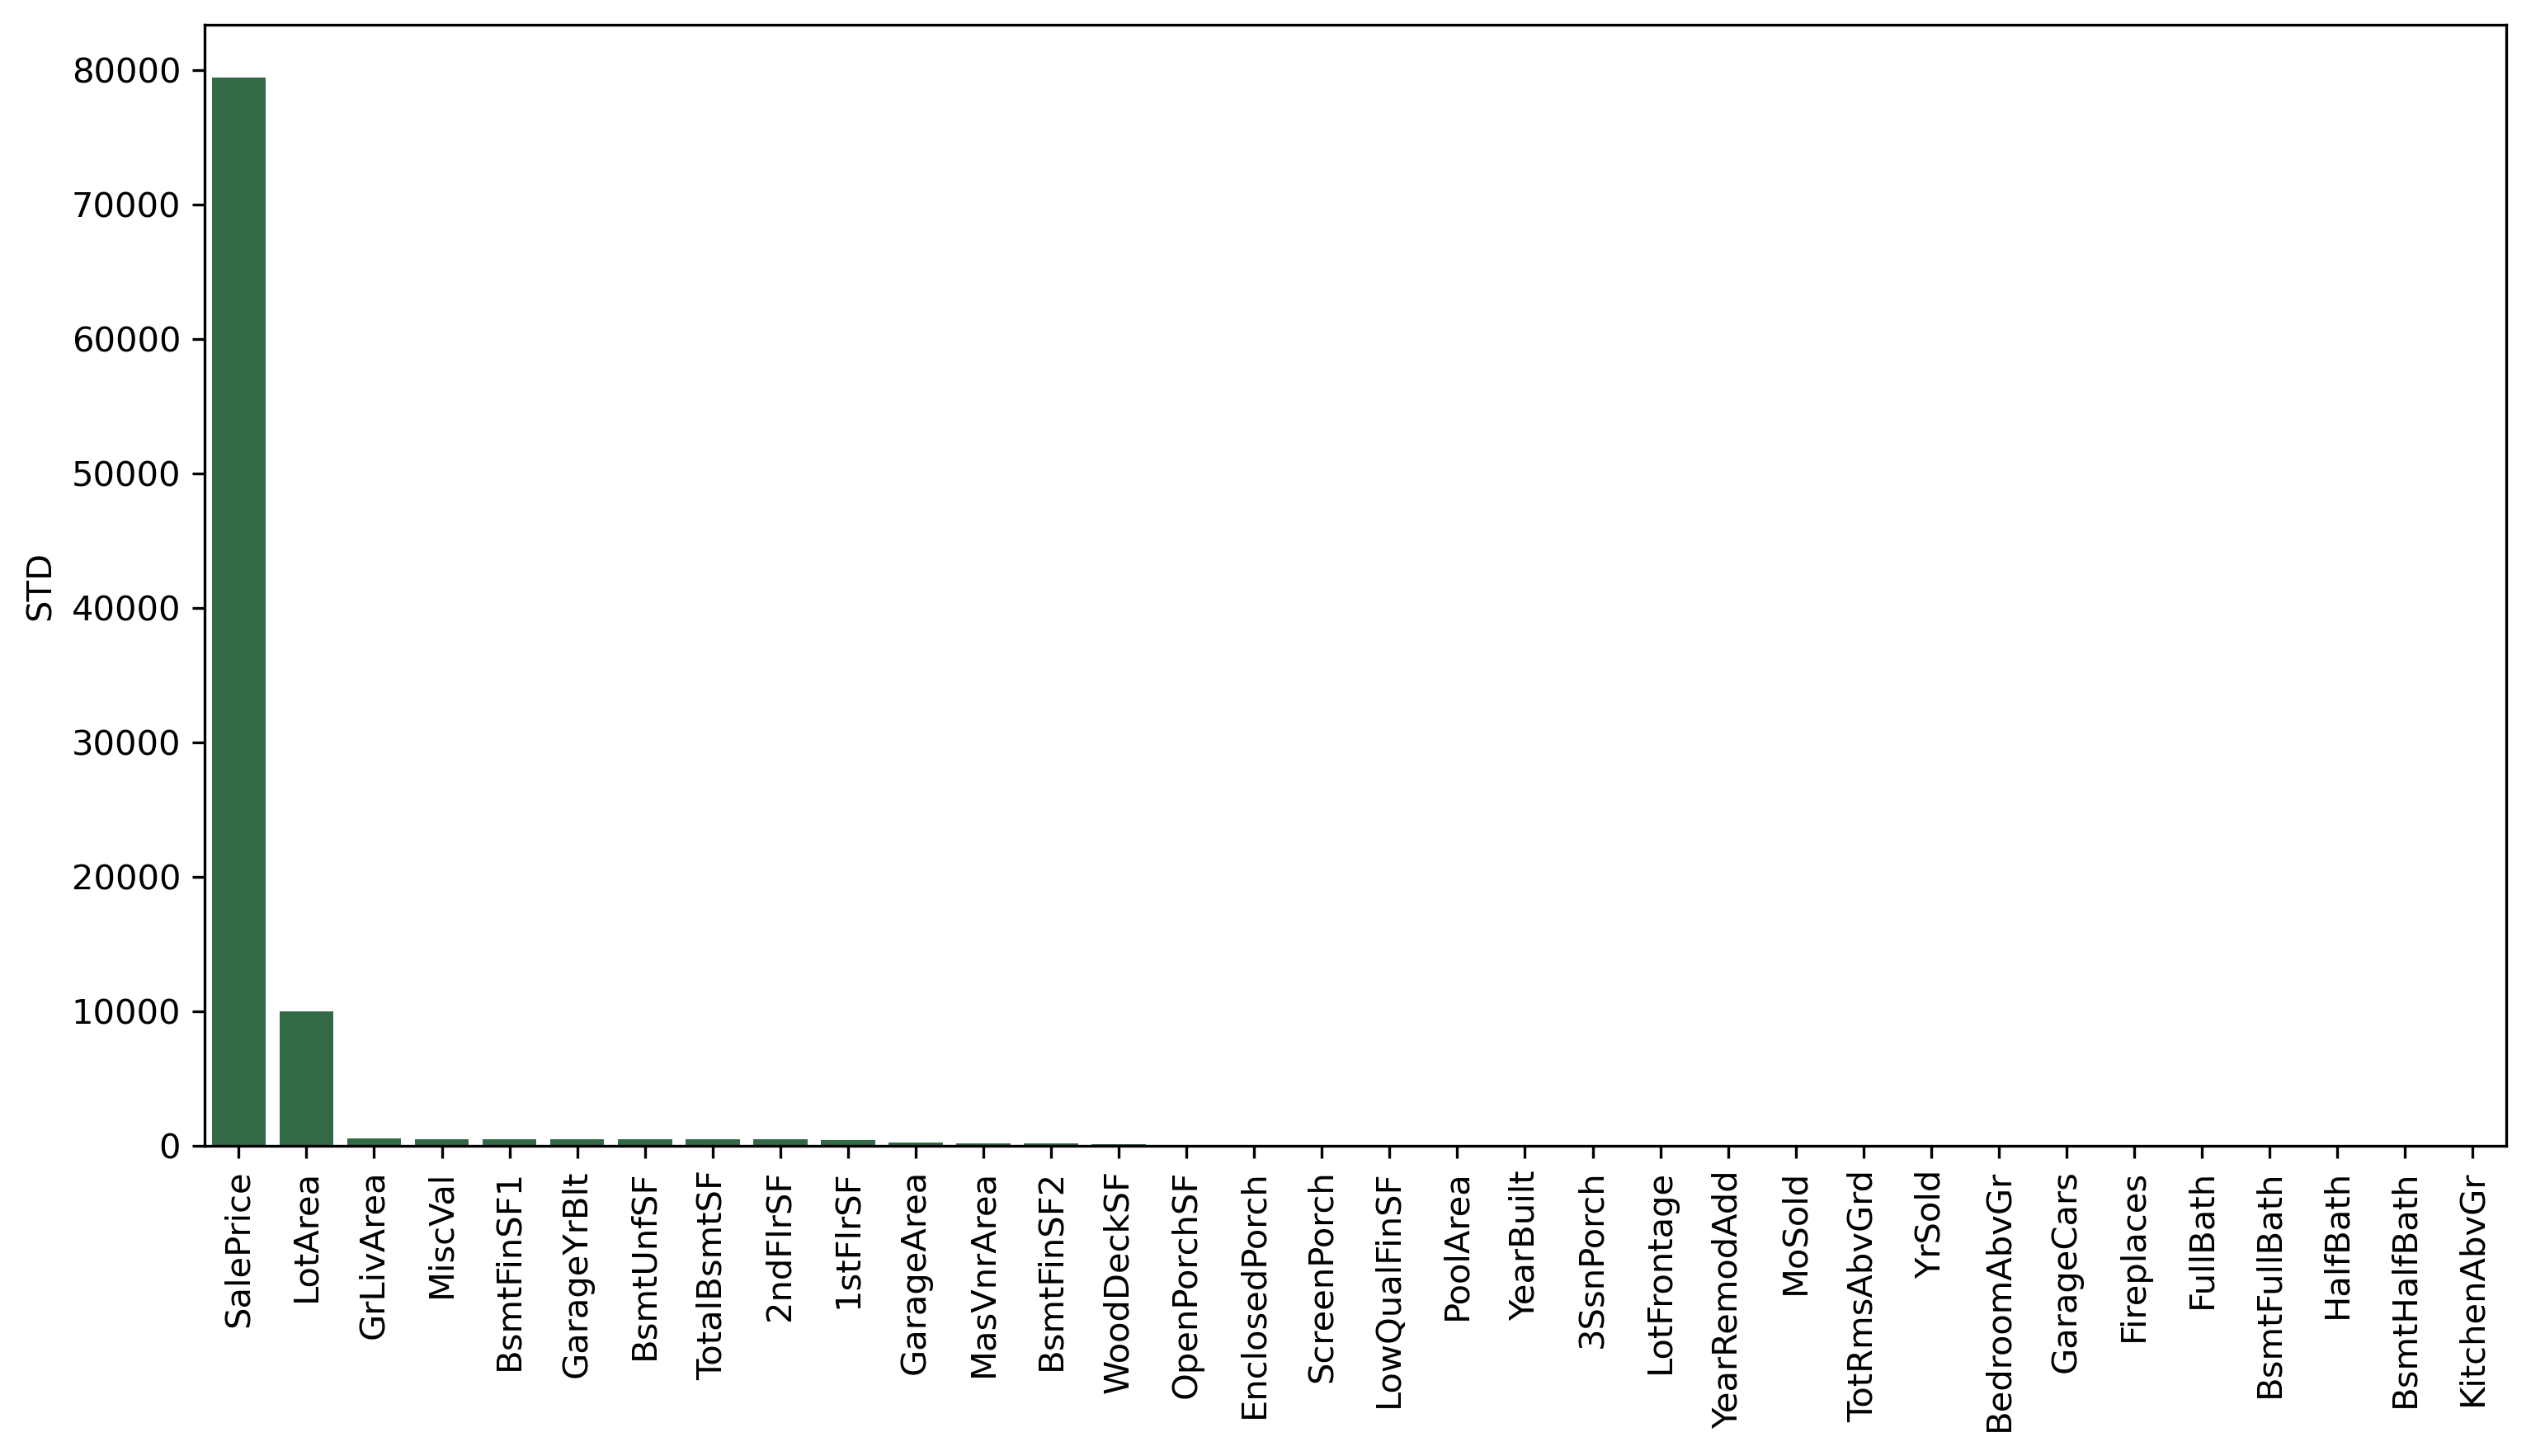

In [18]:
fig,axes = plt.subplots(figsize=[12,6],dpi=300)
g = sns.barplot(x=std_rank.index,y=std_rank.STD,color='#297343')
g.set_xticklabels(std_rank.index,rotation=90)
plt.show()

In [31]:
skewness = pd.DataFrame(np.vstack([ss.skew(interval.loc[:,:'YrSold']).reshape(-1,1), ss.skew(ratio).reshape(-1,1)]),
                        columns=['SKEW'],
                        index=interval.loc[:,:'YrSold'].columns.append(ratio.columns)).sort_values(by='SKEW',ascending=False)
skewness.style.background_gradient(cmap=color_map)

,SKEW
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


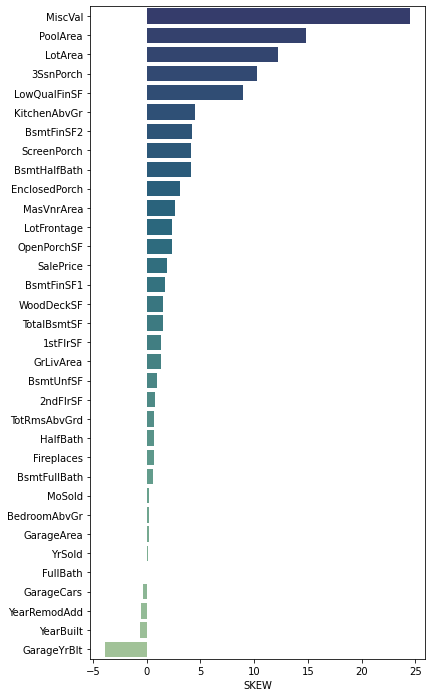

In [54]:
fig,axes = plt.subplots(figsize=[6,12])
g = sns.barplot(x=skewness.SKEW,y=skewness.index,palette='crest_r')
plt.show()

In [55]:
kurtosis = pd.DataFrame(np.vstack([ss.kurtosis(interval.loc[:,:'YrSold']).reshape(-1,1), ss.kurtosis(ratio).reshape(-1,1)]),
                        columns=['KURT'],
                        index=interval.loc[:,:'YrSold'].columns.append(ratio.columns)).sort_values(by='KURT',ascending=False)
kurtosis.style.background_gradient(cmap=color_map)

,KURT
MiscVal,698.600840
PoolArea,222.500507
LotArea,202.543793
3SsnPorch,123.235177
LowQualFinSF,82.945932
LotFrontage,21.753268
KitchenAbvGr,21.454627
BsmtFinSF2,20.040415
ScreenPorch,18.371874
BsmtHalfBath,16.336436


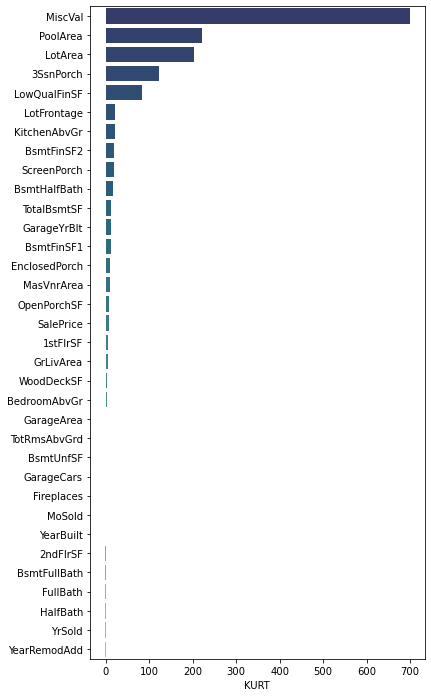

In [61]:
fig,axes = plt.subplots(figsize=[6,12])
g = sns.barplot(x=kurtosis.KURT,y=kurtosis.index,palette='crest_r')
plt.show()

In [72]:
iqr = pd.DataFrame(np.vstack([ss.iqr(interval.loc[:,:'YrSold'],axis=0).reshape(-1,1), ss.iqr(ratio,axis=0).reshape(-1,1)]),
                        columns=['IQR'],
                        index=interval.loc[:,:'YrSold'].columns.append(ratio.columns)).sort_values(by='IQR',ascending=False)
iqr.style.background_gradient(cmap=color_map)

,IQR
SalePrice,84025.000000
LotArea,4048.000000
2ndFlrSF,728.000000
BsmtFinSF1,712.250000
GrLivArea,647.250000
BsmtUnfSF,585.000000
1stFlrSF,509.250000
TotalBsmtSF,502.500000
GarageArea,241.500000
WoodDeckSF,168.000000


In [84]:
fig,axes = plt.subplots(nrows=17,ncols=2,figsize=[18,72],dpi=300)
cols = interval.loc[:,:'YrSold'].columns.append(ratio.columns)
axes = axes.ravel()

for i in range(len(axes)):
    sns.boxplot(x=data[cols[i]],color='#297343',ax=axes[i])

plt.show()

## Analysis